# 파이토치(PyTorch)의 nn.Embedding()
파이토치에서는 임베딩 벡터를 사용하는 방법이 크게 두 가지가 있습니다. 바로 임베딩 층(embedding layer)을 만들어 훈련 데이터로부터 처음부터 임베딩 벡터를 학습하는 방법과 미리 사전에 훈련된 임베딩 벡터(pre-trained word embedding)들을 가져와 사용하는 방법입니다. 

nn.embedding()

 임베딩 층은 룩업 테이블이다.
임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야 합니다.

어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터

임베딩 층은 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고 이 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련됩니다. 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됩니다. 그리고 이 밀집 벡터를 임베딩 벡터라고 부릅니다.

정수를 밀집 벡터 또는 임베딩 벡터로 맵핑한다는 것은 어떤 의미일까요? 특정 단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터 임베딩 벡터 값을 가져오는 룩업 테이블이라고 볼 수 있습니다. 그리고 이 테이블은 단어 집합의 크기만큼의 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가집니다.

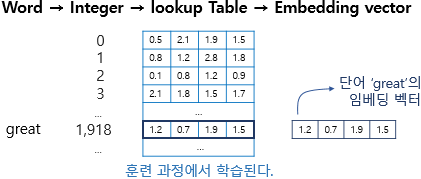

위의 그림은 단어 great이 정수 인코딩 된 후 테이블로부터 해당 인덱스에 위치한 임베딩 벡터를 꺼내오는 모습을 보여줍니다. 위의 그림에서는 임베딩 벡터의 차원이 4로 설정되어져 있습니다. 그리고 단어 great은 정수 인코딩 과정에서 1,918의 정수로 인코딩이 되었고 그에 따라 단어 집합의 크기만큼의 행을 가지는 테이블에서 인덱스 1,918번에 위치한 행을 단어 great의 임베딩 벡터로 사용합니다. 이 임베딩 벡터는 모델의 입력이 되고, 역전파 과정에서 단어 great의 임베딩 벡터값이 학습됩니다.

룩업 테이블의 개념을 이론적으로 우선 접하고, 처음 파이토치를 배울 때 어떤 분들은 임베딩 층의 입력이 원-핫 벡터가 아니어도 동작한다는 점에 헷갈려 합니다. 파이토치는 단어를 정수 인덱스로 바꾸고 원-핫 벡터로 한번 더 바꾸고나서 임베딩 층의 입력으로 사용하는 것이 아니라, 단어를 정수 인덱스로만 바꾼채로 임베딩 층의 입력으로 사용해도 룩업 테이블 된 결과인 임베딩 벡터를 리턴합니다.



In [26]:
train_data = 'you need to know how to code'
word=set(train_data.split())
vocab={words:i+2 for i, words in enumerate(word)}
'''
in 연산자는 시퀀스 객체 안에서 찾고자 하는 값이 존재하면 True를 반환하고, 존재하지 않으면 False를 반환한다.
not in 연산자는 그 반대의 역할을 한다.
'''
vocab['<unk>']=0
vocab['<pad>']=1

print(vocab)

{'to': 2, 'you': 3, 'need': 4, 'code': 5, 'how': 6, 'know': 7, '<unk>': 0, '<pad>': 1}


In [29]:
import torch
from torch import nn
from matplotlib import pyplot as mp
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


embedding = torch.FloatTensor([
                               [ 0.0,  0.0,  0.0],
                               [ 0.0,  0.0,  0.0],
                               [ 0.2,  0.9,  0.3],
                               [ 0.1,  0.5,  0.7],
                               [ 0.2,  0.1,  0.8],
                               [ 0.4,  0.1,  0.1],
                               [ 0.1,  0.8,  0.9],
                               [ 0.6,  0.1,  0.1]])

sample='you need to run'.split()
index=[]
for word in sample:
    try:
        index.append(vocab[word])
    except KeyError:
        index.append(vocab['<unk>'])

index=torch.LongTensor(index)
result=embedding[index,:]
print(result)


tensor([[0.1000, 0.5000, 0.7000],
        [0.2000, 0.1000, 0.8000],
        [0.2000, 0.9000, 0.3000],
        [0.0000, 0.0000, 0.0000]])


In [61]:
#임베딩 층 사용하기
import torch
from torch import nn
import torch.nn as nn
from matplotlib import pyplot as mp
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
train_data = 'you need to know how to code'
train_data = '나는 야 꿔다놓은 보릿자루'

word=set(train_data.split())

vocab={tkn:i+2 for i, tkn in enumerate(word)}
vocab['<unk>']=0
vocab['<pad>']=1

print(vocab)
embadding=nn.Embedding(num_embeddings=len(vocab),
                      embedding_dim=3,
                      padding_idx=1)

print(embedding)

{'나는': 2, '야': 3, '보릿자루': 4, '꿔다놓은': 5, '<unk>': 0, '<pad>': 1}
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.2000, 0.9000, 0.3000],
        [0.1000, 0.5000, 0.7000],
        [0.2000, 0.1000, 0.8000],
        [0.4000, 0.1000, 0.1000],
        [0.1000, 0.8000, 0.9000],
        [0.6000, 0.1000, 0.1000]])


# 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)
임베딩 벡터를 얻기 위해서 파이토치의 nn.Embedding()을 사용하기도 하지만, 때로는 이미 훈련되어져 있는 워드 임베딩을 불러서 이를 임베딩 벡터로 사용하기도 합니다. 훈련 데이터가 부족한 상황이라면 모델에 파이토치의 nn.Embedding()을 사용하는 것보다 다른 텍스트 데이터로 사전 훈련되어 있는 임베딩 벡터를 불러오는 것이 나은 선택일 수 있습니다.

훈련 데이터가 적다면 파이토치의 nn.Embedding()으로 해당 문제에 충분히 특화된 임베딩 벡터를 만들어내는 것이 쉽지 않습니다. 이 경우, 해당 문제에 특화된 것은 아니지만 보다 일반적이고 보다 많은 훈련 데이터로 이미 Word2Vec이나 GloVe 등으로 학습되어져 있는 임베딩 벡터들을 사용하는 것이 성능의 개선을 가져올 수 있습니다.

In [179]:
import numpy as np
import gensim
from collections import Counter

sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
#sentences=['나는 야 꿔다놓은 보릿자루','다이노소어 웡, 웡, 웡','라이드 더 뱅가드 드래고닉 오버로드','왁타버스']

y_train=[1,0,0,1,1,0,1]
token=[sent.split() for sent in sentences]  #for sent in sentences를 먼저 실행, 후에 sent,split()실행
print(token)

word=[]
for sent in token:
    for words in sent:
        word.append(words)

word_count=Counter(word)

print(word_count)
print(len(word_count))
'''
nice가 등장 빈도수로 가장 높은 단어이고, 그 다음은 great, 그 다음은 best로 등장 빈도가 높은 순서대로 단어가 정렬된 상태입니다.
이제 이로부터 단어 집합을 완성해봅시다.
0번은 패딩 토큰을 위한 용도로 사용하고,
1번은 단어 집합에 없는 단어가 등장하는 OOV(Out-Of-Vocabulary) 문제가 발생하면 사용하는 용도로 각각 할당합니다.
'''
vocab=sorted(word_count,key=word_count.get,reverse=True)
print(vocab)


word_index={}
word_index['<unk>']=0
word_index['<pad>']=1

for index, word in enumerate(vocab):
    word_index[word]=index+2

vocab_size=len(vocab)
print(word_index)
print(vocab_size)



def tts(token_data, word_index):
    encored=[]
    for sent in token_data:
        index_seq=[]
        for word in sent:
            try:
                index_seq.append(word_index[word])
            except KeyError:
                index_seq.append(word_index['<unk>'])
        encored.append(index_seq)
    return encoded
encoded=tts(token,word_index)
print(encoded)

max_length=max(len(l) for l in encoded)

print(max_length)
'''
def pad_seq(sentences, max_len):
    feature=np.zeros((len(sentences),max_len),dtype=int)
    for index, sentence in enumerate(sentences):
        if len(sentence) != 0:
            feature[index, :len(sentence)]=np.array(sentence)[:max_len]
    
    return feature

    
#x_train=pad_seq(encoded,max_len=max_length)
x_train=pad_seq(encoded, max_len=max_len)

y_train=np.array(y_train)

print(x_train)'''

[['nice', 'great', 'best', 'amazing'], ['stop', 'lies'], ['pitiful', 'nerd'], ['excellent', 'work'], ['supreme', 'quality'], ['bad'], ['highly', 'respectable']]
Counter({'nice': 1, 'great': 1, 'best': 1, 'amazing': 1, 'stop': 1, 'lies': 1, 'pitiful': 1, 'nerd': 1, 'excellent': 1, 'work': 1, 'supreme': 1, 'quality': 1, 'bad': 1, 'highly': 1, 'respectable': 1})
15
['nice', 'great', 'best', 'amazing', 'stop', 'lies', 'pitiful', 'nerd', 'excellent', 'work', 'supreme', 'quality', 'bad', 'highly', 'respectable']
{'<unk>': 0, '<pad>': 1, 'nice': 2, 'great': 3, 'best': 4, 'amazing': 5, 'stop': 6, 'lies': 7, 'pitiful': 8, 'nerd': 9, 'excellent': 10, 'work': 11, 'supreme': 12, 'quality': 13, 'bad': 14, 'highly': 15, 'respectable': 16}
15
[[2, 3, 4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14], [15, 16]]
4


'\ndef pad_seq(sentences, max_len):\n    feature=np.zeros((len(sentences),max_len),dtype=int)\n    for index, sentence in enumerate(sentences):\n        if len(sentence) != 0:\n            feature[index, :len(sentence)]=np.array(sentence)[:max_len]\n    \n    return feature\n\n    \n#x_train=pad_seq(encoded,max_len=max_length)\nx_train=pad_seq(encoded, max_len=max_len)\n\ny_train=np.array(y_train)\n\nprint(x_train)'

In [180]:

def pad_seq(sentences, max_len):
    feature=np.zeros((len(sentences),max_len),dtype=int)
    for index, sentence in enumerate(sentences):
        if len(sentence) != 0:
            feature[index, :len(sentence)]=np.array(sentence)[:max_len]
    
    return feature

    
#x_train=pad_seq(encoded,max_len=max_length)
x_train=pad_seq(encoded, max_len=max_length)

y_train=np.array(y_train)

print(x_train)
print('============================================')
print(y_train)

'''
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

X_train = pad_sequences(encoded, max_len=max_len)
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)
'''
#모든 데이터의 길이가 4로 변환된 것을 확인하였습니다. 이제 nn.Embedding()를 이용하여 모델을 설계합니다.



[[ 2  3  4  5]
 [ 6  7  0  0]
 [ 8  9  0  0]
 [10 11  0  0]
 [12 13  0  0]
 [14  0  0  0]
 [15 16  0  0]]
[1 0 0 1 1 0 1]


"\ndef pad_sequences(sentences, max_len):\n  features = np.zeros((len(sentences), max_len), dtype=int)\n  for index, sentence in enumerate(sentences):\n    if len(sentence) != 0:\n      features[index, :len(sentence)] = np.array(sentence)[:max_len]\n  return features\n\nX_train = pad_sequences(encoded, max_len=max_len)\ny_train = np.array(y_train)\nprint('패딩 결과 :')\nprint(X_train)\n"

In [184]:
import numpy as np
from collections import Counter
import gensim
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

tokenized_sentences = [sent.split() for sent in sentences]
print('단어 토큰화 된 결과 :', tokenized_sentences)
word_list = []
for sent in tokenized_sentences:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))

# 등장 빈도순으로 정렬
vocab = sorted(word_counts, key=word_counts.get, reverse=True)  # ==> 이 부분이 빠졌었음
print(vocab)


word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab) :
  word_to_index[word] = index + 2

vocab_size = len(word_to_index)
print('패딩 토큰, UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)
print(word_to_index)

def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

X_encoded = texts_to_sequences(tokenized_sentences, word_to_index)
print(X_encoded)
max_len = max(len(l) for l in X_encoded)
print('최대 길이 :',max_len)


def pad_sequences(sentences, max_length):
  features = np.zeros((len(sentences), max_length), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_length]
  return features

X_train = pad_sequences(X_encoded, max_len=max_length)
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)

단어 토큰화 된 결과 : [['nice', 'great', 'best', 'amazing'], ['stop', 'lies'], ['pitiful', 'nerd'], ['excellent', 'work'], ['supreme', 'quality'], ['bad'], ['highly', 'respectable']]
총 단어수 : 15
['nice', 'great', 'best', 'amazing', 'stop', 'lies', 'pitiful', 'nerd', 'excellent', 'work', 'supreme', 'quality', 'bad', 'highly', 'respectable']
패딩 토큰, UNK 토큰을 고려한 단어 집합의 크기 : 17
{'<PAD>': 0, '<UNK>': 1, 'nice': 2, 'great': 3, 'best': 4, 'amazing': 5, 'stop': 6, 'lies': 7, 'pitiful': 8, 'nerd': 9, 'excellent': 10, 'work': 11, 'supreme': 12, 'quality': 13, 'bad': 14, 'highly': 15, 'respectable': 16}
[[2, 3, 4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14], [15, 16]]
최대 길이 : 4


TypeError: pad_sequences() got an unexpected keyword argument 'max_len'

In [181]:
import torch
from torch import nn as nn
import torch.optim as opt
from torch.utils.data import DataLoader, TensorDataset

class simple_model(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(simple_model, self).__init__()
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.flatten=nn.Flatten()
        self.fc=nn.Linear(embedding_dim*max_length,1)
        self.sigmoid=nn.Sigmoid()

    def forward(self,x):
        embad=self.embedding(x)
        flatten=self.flatten(embad)
        output=self.fc(flatten)
        sigmoid=self.sigmoid(output)
        return self.sigmoid(output)

device=torch.device('cuda'if torch.cuda.is_available()else'cpu')


embedding_dim=1000
simple_model=simple_model(vocab_size,embedding_dim).to(device)


criter=nn.BCELoss()  #Binary Cross Entropy
opt=opt.Adam(simple_model.parameters())


train_data=TensorDataset(torch.tensor(x_train,dtype=torch.long),torch.tensor(y_train,dtype=torch.float32))
train_loader=DataLoader(train_data,batch_size=2)
#train_loader=DataLoader(train_data,batch_size=5) =>2
#데이터가 7개였으므로 배치 크기 2로 묶으면 총 묶음은 4개(2개, 2개, 2개, 1개)가 됩니다.


print(len(train_loade))

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [182]:
for epoch in range(100):
    for input, target in train_loader:
        # inputs.shape == (배치 크기, 문장 길이)
        # targets.shape == (배치 크기)
        input,target=input.to(device),target.to(device)
        opt.zero_grad()
        output=simple_model(input).view(-1)

        loss=criter(output,target)
        loss.backward()
        opt.step()
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [202]:
import numpy as np
from collections import Counter
import gensim
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]
tokenized_sentences = [sent.split() for sent in sentences]
print('단어 토큰화 된 결과 :', tokenized_sentences)
word_list = []
for sent in tokenized_sentences:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))

# 등장 빈도순으로 정렬
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print(vocab)
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab) :
  word_to_index[word] = index + 2

vocab_size = len(word_to_index)
print('패딩 토큰, UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)
print(word_to_index)

def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

X_encoded = texts_to_sequences(tokenized_sentences, word_to_index)
print(X_encoded)
max_len = max(len(l) for l in X_encoded)
print('최대 길이 :',max_len)
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

X_train = pad_sequences(X_encoded, max_len=max_len)
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)


단어 토큰화 된 결과 : [['nice', 'great', 'best', 'amazing'], ['stop', 'lies'], ['pitiful', 'nerd'], ['excellent', 'work'], ['supreme', 'quality'], ['bad'], ['highly', 'respectable']]
총 단어수 : 15
['nice', 'great', 'best', 'amazing', 'stop', 'lies', 'pitiful', 'nerd', 'excellent', 'work', 'supreme', 'quality', 'bad', 'highly', 'respectable']
패딩 토큰, UNK 토큰을 고려한 단어 집합의 크기 : 17
{'<PAD>': 0, '<UNK>': 1, 'nice': 2, 'great': 3, 'best': 4, 'amazing': 5, 'stop': 6, 'lies': 7, 'pitiful': 8, 'nerd': 9, 'excellent': 10, 'work': 11, 'supreme': 12, 'quality': 13, 'bad': 14, 'highly': 15, 'respectable': 16}
[[2, 3, 4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14], [15, 16]]
최대 길이 : 4
패딩 결과 :
[[ 2  3  4  5]
 [ 6  7  0  0]
 [ 8  9  0  0]
 [10 11  0  0]
 [12 13  0  0]
 [14  0  0  0]
 [15 16  0  0]]


In [203]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
class SimpleModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SimpleModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(embedding_dim * max_len, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        # embedded.shape == (배치 크기, 문장의 길이, 임베딩 벡터의 차원)
        embedded = self.embedding(x)
        # flattend.shape == (배치 크기, 문장의 길이 × 임베딩 벡터의 차원)
        flattened = self.flatten(embedded)
        # output.shape == (배치 크기, 1)
        output = self.fc(flattened)
        return self.sigmoid(output)
        
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

embedding_dim = 100
simple_model = SimpleModel(vocab_size, embedding_dim).to(device)

criterion = nn.BCELoss()
optimizer = Adam(simple_model.parameters())

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.long), torch.tensor(y_train, dtype=torch.float32))
train_dataloader = DataLoader(train_dataset, batch_size=2)
print(len(train_dataloader))

for epoch in range(10):
    for inputs, targets in train_dataloader:
        # inputs.shape == (배치 크기, 문장 길이)
        # targets.shape == (배치 크기)
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        # outputs.shape == (배치 크기)
        outputs = simple_model(inputs).view(-1) 
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


# 사전 훈련된 임베딩을 사용하는 경우

In [209]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j" -O GoogleNews-vectors-negative300.bin.gz && rm -rf /tmp/cookies.txt

--2024-01-10 21:09:31--  https://docs.google.com/uc?export=download&confirm=t&id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j
docs.google.com (docs.google.com) 해석 중... 172.217.26.238, 2404:6800:4004:824::200e
다음으로 연결 중: docs.google.com (docs.google.com)|172.217.26.238|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 303 See Other
위치: https://doc-0c-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5uskmavogl75th3rq3cdqv4nh0kgdb0b/1704888525000/17609157229046208934/*/1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j?e=download&uuid=cbcf733a-5249-4343-83be-22b65a979c58 [따라감]
경고: HTTP에 와일드카드 문자를 지원하지 않습니다.
--2024-01-10 21:09:32--  https://doc-0c-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5uskmavogl75th3rq3cdqv4nh0kgdb0b/1704888525000/17609157229046208934/*/1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j?e=download&uuid=cbcf733a-5249-4343-83be-22b65a979c58
doc-0c-7k-docs.googleusercontent.com (doc-0c-7k-docs.googleusercontent.com) 해석 중... 142.250.196.129, 2404:6800:400a:80c

In [210]:
# 구글의 사전 훈련된 Word2vec 모델을 로드합니다.
word2vec= gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True) 


In [219]:
embadding_matrix=np.zeros((vocab_size,300))
print(embadding_matrix.shape)

def vec(word):
    if word in word2vec:
        return word2vec[word]
    else:
        return None

for word,i in word_index.items():
    if i>2:
        temp=vec(word)
        if temp is not None:   #is 와 is not은 객체를 비교한다.
            embadding_matrix[i]=temp

print(embadding_matrix[0])

word_index['great']

np.all(word2vec['great']==embadding_matrix[3])



(17, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


True

In [225]:
class preembadding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(preembadding,self).__init__()
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        #self.embedding.weight=nn.Parameter(torch.tensor(embadding_matrix,dtype=torch.Float32))
        self.embedding.weight=nn.Parameter(torch.tensor(embadding_matrix,dtype=torch.float32))
        self.embedding.weight.request_grad=True
        self.flatten=nn.Flatten()
        self.fc=nn.Linear(embedding_dim*max_len,1)
        self.sigmoid=nn.Sigmoid()
    def forword(self, x):
        embedded=self.embedding(x)
        flatten=self.flatten(embedded)
        output=self.fc(flatten)
        return self.sigmoid(output)

model=preembadding(vocab_size,300).to(device)

criter=nn.BCELoss()
opt=Adam(model.parameters(),lr=0.05)


train=TensorDataset(torch.tensor(x_train,dtype=torch.long),torch.tensor(y_train,dtype=torch.float32))
train_loader=DataLoader(train,batch_size=2)

print(len(train_loader))

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [228]:
for epoch in range(1000):
    for input,target in train_loader:
        input,target=input.to(device), target.to(device)
        opt.zero_grad()
        output=model(input).view(-1)
        loss=criter(output,target)
        loss.backward()
        opt.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


# 엘모(Embeddings from Language Model, ELMo)
ELMo(Embeddings from Language Model)는 2018년에 제안된 새로운 워드 임베딩 방법론입니다. ELMo라는 이름은 세서미 스트리트라는 미국 인형극의 케릭터 이름이기도 한데, 뒤에서 배우게 되는 BERT나 최근 마이크로소프트가 사용한 Big Bird라는 NLP 모델 또한 ELMo에 이어 세서미 스트리트의 케릭터의 이름을 사용했습니다. ELMo는 Embeddings from Language Model의 약자입니다. 해석하면 '언어 모델로 하는 임베딩'입니다. ELMo의 가장 큰 특징은 사전 훈련된 언어 모델(Pre-trained language model)을 사용한다는 점입니다. 이는 ELMo의 이름에 LM이 들어간 이유입니다.

# ELMo(Embeddings from Language Model)
**Bank라는 단어를 생각해봅시다. Bank Account(은행 계좌)와 River Bank(강둑)에서의 Bank는 전혀 다른 의미를 가지는데, Word2Vec이나 GloVe 등으로 표현된 임베딩 벡터들은 이를 제대로 반영하지 못한다는 단점이 있습니다.** 예를 들어서 Word2Vec이나 GloVe 등의 임베딩 방법론으로 Bank란 단어를 [0.2 0.8 -1.2]라는 임베딩 벡터로 임베딩하였다고 하면, 이 단어는 Bank Account(은행 계좌)와 River Bank(강둑)에서의 Bank는 전혀 다른 의미임에도 불구하고 두 가지 상황 모두에서 [0.2 0.8 -1.2]의 벡터가 사용됩니다.

같은 표기의 단어라도 문맥에 따라서 다르게 워드 임베딩을 할 수 있으면 자연어 처리의 성능을 올릴 수 있을 것입니다. 워드 임베딩 시 문맥을 고려해서 임베딩을 하겠다는 아이디어가 문맥을 반영한 워드 임베딩(Contextualized Word Embedding) 입니다.

# biLM(Bidirectional Language Model)의 사전 훈련
다음 단어를 예측하는 작업인 언어 모델링을 상기해봅시다. 아래의 그림은 은닉층이 2개인 일반적인 단방향 RNN 언어 모델의 언어 모델링을 보여줍니다.

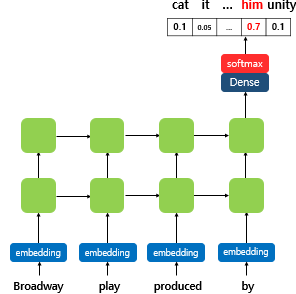

RNN 언어 모델은 문장으로부터 단어 단위로 입력을 받는데, RNN 내부의 은닉 상태 ht는 시점(time step)이 지날수록 점점 업데이트되갑니다. 이는 결과적으로 RNN의 ht의 값이 문장의 문맥 정보를 점차적으로 반영한다고 말할 수 있습니다. 그런데 ELMo는 위의 그림의 순방향 RNN 뿐만 아니라, 위의 그림과는 반대 방향으로 문장을 스캔하는 역방향 RNN 또한 활용합니다. ELMo는 양쪽 방향의 언어 모델을 둘 다 학습하여 활용한다고하여 이 언어 모델을 biLM(Bidirectional Language Model) 이라고 합니다.

ELMo에서 말하는 biLM은 기본적으로 다층 구조(Multi-layer)를 전제로 합니다. 은닉층이 최소 2개 이상이라는 의미입니다. 아래의 그림은 은닉층이 2개인 순방향 언어 모델과 역방향 언어 모델의 모습을 보여줍니다.

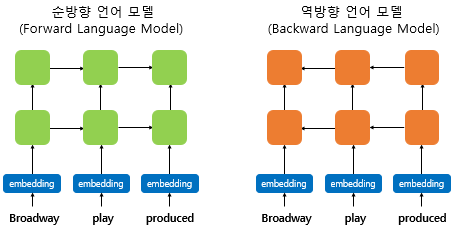

이때 biLM의 각 시점의 입력이 되는 단어 벡터는 이번 챕터에서 설명한 임베딩 층(embedding layer)을 사용해서 얻은 것이 아니라 합성곱 신경망을 이용한 문자 임베딩(character embedding)을 통해 얻은 단어 벡터입니다. 문자 임베딩에 대한 설명은 'NLP를 위한 합성곱 신경망' 챕터에서 다루는 내용으로 여기서는 임베딩층, Word2Vec 등 외에 단어 벡터를 얻는 또 다른 방식도 있다고만 알아둡시다. 문자 임베딩은 마치 서브단어(subword)의 정보를 참고하는 것처럼 문맥과 상관없이 dog란 단어와 doggy란 단어의 연관성을 찾아낼 수 있습니다. 또한 이 방법은 OOV에도 견고한다는 장점이 있습니다.

주의할 점은 앞서 설명한 양방향 RNN과 ELMo에서의 biLM은 다릅니다. 양방향 RNN은 순방향 RNN의 은닉 상태와 역방향의 RNN의 은닉 상태를 연결(concatenate)하여 다음층의 입력으로 사용합니다. 반면, biLM의 순방향 언어모델과 역방향 언어모델이라는 두 개의 언어 모델을 별개의 모델로 보고 학습합니다.
-->양방향RNN:2중인격  //  biML:쌍둥이

# biLM의 활용
biLM이 언어 모델링을 통해 학습된 후 ELMo가 사전 훈련된 biLM을 통해 입력 문장으로부터 단어를 임베딩하기 위한 과정을 보겠습니다.

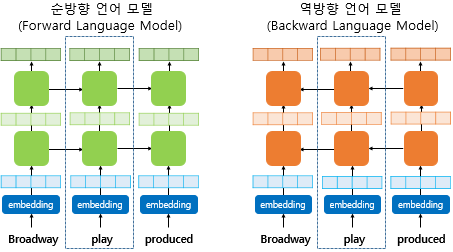

이 예제에서는 play란 단어가 임베딩이 되고 있다는 가정 하에 ELMo를 설명합니다. play라는 단어를 임베딩 하기위해서 ELMo는 위의 점선의 사각형 내부의 각 층의 결과값을 재료로 사용합니다. **다시 말해 해당 시점(time step)의 BiLM의 각 층의 출력값을 가져옵니다. 그리고 순방향 언어 모델과 역방향 언어 모델의 각 층의 출력값을 연결(concatenate)하고 추가 작업을 진행합니다.**

**여기서 각 층의 출력값이란 첫번째는 임베딩 층을 말하며, 나머지 층은 각 층의 은닉 상태를 말합니다. ELMo의 직관적인 아이디어는 각 층의 출력값이 가진 정보는 전부 서로 다른 종류의 정보를 갖고 있을 것이므로, 이들을 모두 활용한다는 점에 있습니다. 아래는 ELMo가 임베딩 벡터를 얻는 과정을 보여줍니다.**

1) 각 층의 출력값을 연결(concatenate)한다.

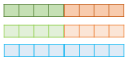

2) 각 층의 출력값 별로 가중치를 준다.

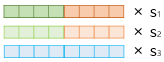

이 가중치를 여기서는 s1,s2,s3라고 합시다.

3) 각 층의 출력값을 모두 더한다.

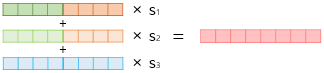

2)번과 3)번의 단계를 요약하여 가중합(Weighted Sum)을 한다고 할 수 있습니다.

4) 벡터의 크기를 결정하는 스칼라 매개변수를 곱한다.



이 스칼라 매개변수를 여기서는 y(감마)이라고 합시다.

이렇게 완성된 벡터를 ELMo 표현(representation)이라고 합니다. 지금까지는 ELMo 표현을 얻기 위한 과정이고 이제 ELMo를 입력으로 사용하고 수행하고 싶은 텍스트 분류, 질의 응답 시스템 등의 자연어 처리 작업이 있을 것입니다. 예를 들어 텍스트 분류 작업을 하고 싶다고 가정합시다. 그렇다면 ELMo 표현을 어떻게 텍스트 분류 작업에 사용할 수 있을까요?

ELMo 표현을 기존의 임베딩 벡터와 함께 사용할 수 있습니다. 우선 텍스트 분류 작업을 위해서 GloVe와 같은 기존의 방법론을 사용한 임베딩 벡터를 준비했다고 합시다. 이때, GloVe를 사용한 임베딩 벡터만 텍스트 분류 작업에 사용하는 것이 아니라 이렇게 준비된 ELMo 표현을 GloVe 임베딩 벡터와 연결(concatenate)해서 입력으로 사용할 수 있습니다. 그리고 이때 biLM의 가중치는 고정시키고, 위에서 사용한 s1,s2,s3와 y는 훈련 과정에서 학습됩니다.

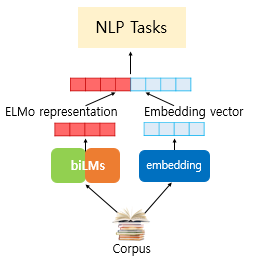

위의 그림은 ELMo 표현이 기존의 GloVe 등과 같은 임베딩 벡터와 함께 NLP 태스크의 입력이 되는 것을 보여줍니다.

문서들을 고정된 길이의 벡터로 변환한다면 벡터 간 비교로 문서들을 서로 비교할 수 있습니다. 각 문서를 문서 벡터로 변환하는 방법은 이미 구현된 패키지인 Doc2Vec이나 Sent2Vec 등을 사용하여 학습하는 방법도 존재하지만, 단어 벡터를 얻은 뒤 문서에 존재하는 단어 벡터들의 평균을 문서 벡터로 간주할 수 있습니다. 

In [255]:
#문서 벡터를 이용한 추천 시스템(Recommendation System using Document Embedding)

import urllib.request
import pandas as ps
import numpy as np
import matplotlib as mp
import torch
import torch.nn
from torch.utils.data import dataset,DataLoader
import requests
import re
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/data.csv", filename="data.csv")

df=ps.read_csv('data.csv')
print(df[:5])
df[:5]

def removeNonAscii(s):
    return ''.join(i for i in s if ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text=text.split()
    stops=set(stopwords.words('english'))
    text=[w for w in text if not w in stops]
    text=''.join(text)
    return text

def remove_html(text):
    html_pattern=re.compile('<. * ?>')
    return html_pattern.sub(r' ',text)

def remove_punchuation(text):
    tokenizer=RegexpTokenizer(r'[a-zA-Z]+')
    text=tokenizer.tokenize(text)
    text=''.join(text)
    return text

df['cleaned'] = df['Desc'].apply(removeNonAscii)
df['cleaned'] = df.cleaned.apply(make_lower_case)
df['cleaned'] = df.cleaned.apply(remove_stop_words)
df['cleaned'] = df.cleaned.apply(remove_punchuation)
df['cleaned'] = df.cleaned.apply(remove_html)

df['cleaned'][:5]

df['cleaned'].replace(' ',np.nan,inplace=True)
print(df['cleaned'].replace(' ',np.nan,inplace=True)
)
df=df[df['cleaned'].notna()]
print(len(df))

corpus=[]
for words in df['cleaned']:
    corpus.append(words.split())

words

   Unnamed: 0.1                                               Desc  \
0             0  We know that power is shifting: From West to E...   
1             1  Following the success of The Accidental Billio...   
2             2  How to tap the power of social software and ne...   
3             3  William J. Bernstein is an American financial ...   
4             4  Amazing book. And I joined Steve Jobs and many...   

   Unnamed: 0                author     genre  \
0         0.0           Moisés Naím  Business   
1         1.0       Blake J. Harris  Business   
2         2.0          Chris Brogan  Business   
3         3.0  William J. Bernstein  Business   
4         4.0           Akio Morita  Business   

                                          image_link  rating  \
0  https://i.gr-assets.com/images/S/compressed.ph...    3.63   
1  https://i.gr-assets.com/images/S/compressed.ph...    3.94   
2  https://i.gr-assets.com/images/S/compressed.ph...    3.78   
3  https://i.gr-assets.com/i

'imbuedeverypagefrankmccourtsastoundinghumorcompassiongloriousbookbearsmarksclassicwhenlookbackchildhoodwondermanagedsurviveallwascoursemiserablechildhoodhappychildhoodhardlyworthwhileworseordinarymiserablechildhoodmiserableirishchildhoodworseyetmiserableirishcatholicchildhoodbeginspulitzerprizewinningmemoirfrankmccourtborndepressionerabrooklynrecentirishimmigrantsraisedslumslimerickirelandfranksmotherangelamoneyfeedchildrensincefranksfathermalachyrarelyworksdrinkswagesyetmalachyexasperatingirresponsiblebeguilingnurturefrankappetiteonethingprovidestoryfranklivesfatherstalescuchulainsavedirelandangelseventhstepbringsmotherbabiesperhapsstoryaccountsfrankssurvivalwearingragsdiapersbeggingpigsheadchristmasdinnergatheringcoalroadsidelightfirefrankendurespovertynearstarvationcasualcrueltyrelativesneighborsyetlivestelltaleeloquenceexuberanceremarkableforgivenessangelasashesimbuedeverypagefrankmccourtsastoundinghumorcompassiongloriousbookbearsmarksclassic'

In [272]:
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec=gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
model=Word2Vec(vector_size=300, window=5, min_count=2, workers=-1)
model.build_vocab(corpus)
model.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz', lockf=1.0, binary=True)
model.train(corpus,total_examples=model.corpus_count,epochs=15)

HTTPError: HTTP Error 404: Not Found

In [270]:
def document_vecter(document_list):
    document_embedding_list=[]

    for line in document_list:
        doc2vec=None
        count=0
        for word in line.split():
            if word in word2vec_model.wv.vocab:
                count += 1
                if doc2vec is None:
                    doc2vec=word2vec_model[word]
                else:
                    doc2vec=doc2vec+word2vec_model[word]

        if doc2vec is not None:
            doc2vec=doc2vec/count
            document_embedding_list.append(doc2vec)
    return document_embedding_list

document_embedding_list=document_vecter(df['cleaned'])
print(len(document_embedding_list))

cosine_simileres=cosine_similerity(document_embedding_list, document_embedding_list)
print('코사인 유사도 매트릭스의 크기 :',cosine_similarities.shape)


NameError: name 'word2vec_model' is not defined

In [ ]:
def recommendate(title):
    book=df[['title','image_link']]
    indice=ps.Series(df.index,index=df['title']).drop_duplicates()
    idx=indice[title]

    sim_score=list(snumerate(cosine_simileres[idx]))
    sim_score=sorted(sim_score, key=lamda x:x[1],reverse=True)
    sim_score=sim_score[1:6]

    book_indice=[i[0]for i in sim_score]
    recomend=book.iloc[book_indice].reset_index(drop=True)
    fig = mp.figure(figsize=(20, 30))

    # 데이터프레임으로부터 순차적으로 이미지를 출력
    for index, row in recommend.iterrows():
        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        fig.add_subplot(1, 5, index + 1)
        mp.imshow(img)
        mp.title(row['title'])

# Doc2Vec으로 공시 사업보고서 유사도 계산하기
Word2Vec은 단어를 임베딩하는 워드 임베딩 알고리즘이었습니다. Doc2Vec은 Word2Vec을 변형하여 문서의 임베딩을 얻을 수 있도록 한 알고리즘입니다. 논문 제목과 논문의 링크는 아래와 같습니다.

논문 제목 : Distributed Representations of Sentences and Documents

논문 링크 : https://arxiv.org/abs/1405.4053

Word2Vec과 마찬가지로 파이썬 머신 러닝 패키지인 Gensim을 통해서 쉽게 사용할 수 있습니다. 

In [273]:
# dart.csv 파일 다운로드
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XS0UlE8gNNTRjnL6e64sMacOhtVERIqL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XS0UlE8gNNTRjnL6e64sMacOhtVERIqL" -O dart.csv && rm -rf /tmp/cookies.txt
# 형태소 분석기 Mecab 설치
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)


--2024-01-11 00:27:46--  https://docs.google.com/uc?export=download&confirm=t&id=1XS0UlE8gNNTRjnL6e64sMacOhtVERIqL
docs.google.com (docs.google.com) 해석 중... 142.250.206.238, 2404:6800:400a:80a::200e
다음으로 연결 중: docs.google.com (docs.google.com)|142.250.206.238|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 303 See Other
위치: https://doc-04-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vv12pceol2grebdi2m5kip8knboviamf/1704900450000/17609157229046208934/*/1XS0UlE8gNNTRjnL6e64sMacOhtVERIqL?e=download&uuid=15f6a854-1e64-4ff1-b046-2fab30324c61 [따라감]
경고: HTTP에 와일드카드 문자를 지원하지 않습니다.
--2024-01-11 00:27:47--  https://doc-04-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vv12pceol2grebdi2m5kip8knboviamf/1704900450000/17609157229046208934/*/1XS0UlE8gNNTRjnL6e64sMacOhtVERIqL?e=download&uuid=15f6a854-1e64-4ff1-b046-2fab30324c61
doc-04-7k-docs.googleusercontent.com (doc-04-7k-docs.googleusercontent.com) 해석 중... 142.250.206.225, 2404:6800:400a:8

In [300]:
#공시 사업 보고서 로드 및 전처리
import pandas as ps
from konlpy.tag import Mecab
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

df=ps.read_csv('/home/eternal/dart.csv',  sep=',')

df=df.dropna() #결측치 제거
df

mecab=Mecab()
tagged_corpus_list=[]
for index,row in tqdm(df.iterrows(),total=len(df)):
    text=row['business']
    tag=row['name']
    tagged_corpus_list.append(TaggedDocument(tags=[tag],words=mecab.morphs(text)))


print(tagged_corpus_list)
print(len(tagged_corpus_list))

tagged_corpus_list[0]

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


100%|███████████████████████████████████████| 2295/2295 [00:31<00:00, 73.76it/s]
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



TaggedDocument(words=['II', '.', '사업', '의', '내용', '1', '.', '사업', '의', '개요', '가', '.', '일반', '적', '인', '사항', '기업', '회계', '기준', '서', '제', '1110', '호', '"', '연결', '재무제표', '"', '의', '의하', '여', '2018', '년', '12', '월', '17', '일', '에', '설립', '한', '동화', '크립톤', '기업가', '정신', '제일', '호', '창업', '벤처', '전문', '사모', '투자', '합자회사', '를', '종속', '회사', '에', '편입', '하', '였', '습니다', '.', '나', '.', '지배', '기업', '의', '현황', '1', ')', '산업', '의', '특성', '제약', '산업', '은', '약학', ',', '화학', ',', '생물학', '등', '여러', '분야', '의', '지식', '과', '기술', '이', '복합', '적', '으로', '필요', '한', '기술', '·', '지식', '집약', '형', '산업', '으로', '인간', '의', '생명', '과', '보건', '에', '직접', '적', '으로', '관련', '된', '제품', '을', '생산', '하', '고', ',', '개발', '·', '제조', '·', '유통', '·', '가격', '등', '을', '정부', '에서', '엄격', '하', '게', '규제', '하', '고', '관리', '하', '는', '산업', '적', '특성', '을', '가지', '고', '있', '습니다', '.', '또한', '신약', '개발', '에', '는', '막대', '한', '시간', '과', '비용', '이', '소요', '되', '며', ',', '성공', '확률', '또한', '높', '지', '않', '으나', '신약', '개발', '에', '성공', '할', '경우', '엔', '엄청난

In [ ]:
# Doc2Vec 학습 및 테스트
from gensim.models import doc2vec

model=doc2vec.Doc2Vec(vector_size=3000,alpha=0.025,min_alpha=0.025,workers=8,window=8)

model.build_vocab(tagged_corpus_list)

model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=50)
model.train(tagged_corpus_list,total_examples=model.corpus_count,epochs=500)

model.save('dart.doc2vec')

In [ ]:
print(f"Tag Size: {len(model.docvecs.doctags.keys())}", end=' / ')

similar_doc=model.docvecs.most_similar('동화약품')
print(similar_doc)
similar_doc = model.docvecs.most_similar('하이트진로')
print(similar_doc)
similar_doc = model.docvecs.most_similar('LG이노텍')
print(similar_doc)
similar_doc = model.docvecs.most_similar('메리츠화재')
print(similar_doc)
similar_doc = model.docvecs.most_similar('카카오')
print(similar_doc)


In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git %cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh
!wget https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2
!python -m wikiextractor.WikiExtractor kowiki-latest-pages-articles.xml.bz2
%ls
images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_210108.sh  text/
kowiki-latest-pages-articles.xml.bz2


In [ ]:
import os
import re

os.listdir('text')

def list_wiki(dirname):
    filepath=[]
    filename=os.listdir(dirname)
    for filenames in filename:
        filepath=os.join(dirname,filenames)
        if os.path.isdir(filepath):
            filepath.extend(list_wiki(filepath))
        else:
            find=re.findall(r"wiki_[0-9][0-9]", filepath)
            if 0<len(find):
                filepath.append(filepath)
    return sorted(filepath)

filepath=list_wiki('text')
len(filepath)

with open("output_file.txt", "w") as outfile:
    for filename in filepath:
        with open(filename)as imfile:
            contents=infile.read()
            outfile.write(contents)

f=open('output_file.txt', encoding="utf8")
i=0
while True:
    line=f.readline()
    if line !='\n':
        i=i+1
        print("%d번째 줄 :"%i + line)
    if i==100:
        break

f.close()


In [ ]:
%ls text/AA


In [ ]:
# 형태소 분석
from tqdm import tqdm
import konlpy.tag import Mecab

mecab=Mecab()

f = open('output_file.txt', encoding="utf8")
lines=f.read().split()
print(lines)
print(len(lines))

lines[:10]

result=[]

for line in tpdm(lines):
    if line:
        result.append(mecab.morphs(line))

len(result)

In [ ]:
#Word2Vec 학습
from gensim.tag import Word2Vec

model=Word2Vec(result, vector_size=100, window=5,min_count=5, workers=4,sg=0)
model_result1 = model.wv.most_similar("대한민국")
print(model_result1)
model_result2 = model.wv.most_similar("어벤져스")
print(model_result2)
model_result3 = model.wv.most_similar("반도체")
print(model_result3)


# 단어 단위 RNN - 임베딩 사용

In [6]:
import torch
import torch.nn as nn
import torch.optim as opt

sentence="Repeat is the best medicine for memory".split()
vocab=list(set(sentence))
print(vocab)

word2index={tkn:i for i, tkn in enumerate(vocab,1)}
word2index['<unk>']=0
print(word2index)
print(word2index['memory'])

index2word={v:k for k,v in word2index.items()}

print(index2word)
print(index2word[2])



['is', 'the', 'for', 'Repeat', 'best', 'medicine', 'memory']
{'is': 1, 'the': 2, 'for': 3, 'Repeat': 4, 'best': 5, 'medicine': 6, 'memory': 7, '<unk>': 0}
7
{1: 'is', 2: 'the', 3: 'for', 4: 'Repeat', 5: 'best', 6: 'medicine', 7: 'memory', 0: '<unk>'}
the


In [7]:
def duild_data(sentence, word2index):
    encord=[word2index[token]for token in sentence]
    input_seq,label_seq=encord[:-1],encord[1:]
    input_seq=torch.LongTensor(input_seq).unsqueeze(0)
    label_seq=torch.LongTensor(label_seq).unsqueeze(0)
    return input_seq, label_seq

x,y=duild_data(sentence, word2index)
print(x)
print(y)


tensor([[4, 1, 2, 5, 6, 3]])
tensor([[1, 2, 5, 6, 3, 7]])


In [19]:
class net(nn.Module):
    def __init__(self,input_size, hidden_size, vocab_size,batch_first=True):
        super(net,self).__init__()
        self.embedding=nn.Embedding(num_embeddings=vocab_size,embedding_dim=input_size)
        self.rnn=nn.RNN(input_size,hidden_size,batch_first=batch_first)
        self.fc=nn.Linear(hidden_size,vocab_size)

    def forward(self,x):
        output=self.embedding(x)
        output,hidden=self.rnn(output)
        output=self.fc(output)
        return output.view(-1,output.size(2))

vocab_size=len(word2index)
input_size=5
hidden_size=20

model=net(vocab_size,input_size,hidden_size)

opt=torch.optim.Adam(model.parameters(),lr=0.05)
'''
loss_f=nn.CrossEntropyLoss()
opt.zero_grad()
loss.backword()
opt.step()
'''
output=model(x)
print(output)
print(output.shape)

decode=lambda y:[index2word.get(x)for x in y]

for step in range(2000):
    opt.zero_grad()# 경사 초기화
    output=model(x)# 순방향 전파
    loss=loss_f(output,y.view(-1))
    loss.backward() # 역방향 전파
    opt.step()    # 매개변수 업데이트

    if step % 40==0:
        print("[{:02d}/201] {:.4f} ".format(step+1, loss))
        pred=output.softmax(-1).argmax(-1).tolist()
        print(" ".join(["Repeat"] + decode(pred)))
        print()

tensor([[ 0.3617, -0.0198,  0.6832, -0.0836,  0.1548,  0.2059,  0.0044, -0.3493,
         -0.1509,  0.2698, -0.3592, -0.1458, -0.1704,  0.2959,  0.4799, -0.4005,
         -0.4656, -0.2418, -0.0504,  0.3501],
        [ 0.0286, -0.4371,  0.7283,  0.3160,  0.0265,  0.2327,  0.2914, -0.9451,
          0.4074,  0.2491,  0.0355, -0.3666,  0.1290,  0.4250,  0.1509, -0.0838,
         -0.4003,  0.2410, -0.0416,  0.0568],
        [-0.1171,  0.0980,  0.3368, -0.2090,  0.1425, -0.3774,  0.4613, -0.5003,
          0.2135, -0.0229, -0.0514, -0.4252, -0.4689,  0.4028,  0.0811, -0.2004,
         -0.2526, -0.0617, -0.3041, -0.1477],
        [ 0.0914, -0.1478,  0.6766,  0.0547,  0.2587,  0.0268,  0.1884, -0.7915,
          0.1286,  0.2486, -0.1230, -0.3558, -0.0493,  0.2984,  0.2117, -0.0551,
         -0.2620, -0.1026, -0.0620,  0.0408],
        [ 0.5564, -0.0103,  0.7975,  0.0589,  0.2826,  0.3145, -0.1310, -0.4597,
         -0.1388,  0.4007, -0.3794, -0.3437, -0.0849,  0.2325,  0.3847, -0.2565,
      